In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR

In [180]:
df = pd.read_csv('Data/marketing_campaign_dataset.csv')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [181]:
df.shape

(200000, 16)

In [182]:
df.isna().any()

Campaign_ID         False
Company             False
Campaign_Type       False
Target_Audience     False
Duration            False
Channel_Used        False
Conversion_Rate     False
Acquisition_Cost    False
ROI                 False
Location            False
Language            False
Clicks              False
Impressions         False
Engagement_Score    False
Customer_Segment    False
Date                False
dtype: bool

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [184]:
df.Campaign_Type.value_counts()

Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64

In [185]:
df.Target_Audience.value_counts()

Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64

In [186]:
df.Duration.value_counts()

Duration
30 days    50255
45 days    50100
60 days    49866
15 days    49779
Name: count, dtype: int64

In [187]:
df.Channel_Used.value_counts()

Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64

In [188]:
df.Acquisition_Cost.value_counts()

Acquisition_Cost
$16,578.00    32
$6,570.00     31
$9,128.00     30
$8,503.00     29
$15,430.00    29
              ..
$6,147.00      3
$7,443.00      3
$12,545.00     3
$14,068.00     2
$9,623.00      2
Name: count, Length: 15001, dtype: int64

In [189]:
df.Location.value_counts()

Location
Miami          40269
New York       40024
Chicago        40010
Los Angeles    39947
Houston        39750
Name: count, dtype: int64

In [190]:
df.Language.value_counts()

Language
Mandarin    40255
Spanish     40102
German      39983
English     39896
French      39764
Name: count, dtype: int64

In [191]:
df.Customer_Segment.value_counts()

Customer_Segment
Foodies                40208
Tech Enthusiasts       40151
Outdoor Adventurers    40011
Health & Wellness      39888
Fashionistas           39742
Name: count, dtype: int64

In [192]:
df.Date.value_counts()

Date
2021-01-01    548
2021-08-16    548
2021-08-24    548
2021-08-23    548
2021-08-22    548
             ... 
2021-12-16    547
2021-12-15    547
2021-12-14    547
2021-12-13    547
2021-12-31    547
Name: count, Length: 365, dtype: int64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2021-04-19'),
  Text(0.0, 0, '2021-01-01'),
  Text(50.0, 0, '2021-07-08'),
  Text(100.0, 0, '2021-11-08'),
  Text(150.0, 0, '2021-09-20'),
  Text(200.0, 0, '2021-03-24'),
  Text(250.0, 0, '2021-02-02'),
  Text(300.0, 0, '2021-06-05'),
  Text(350.0, 0, '2021-12-26'),
  Text(400.0, 0, '')])

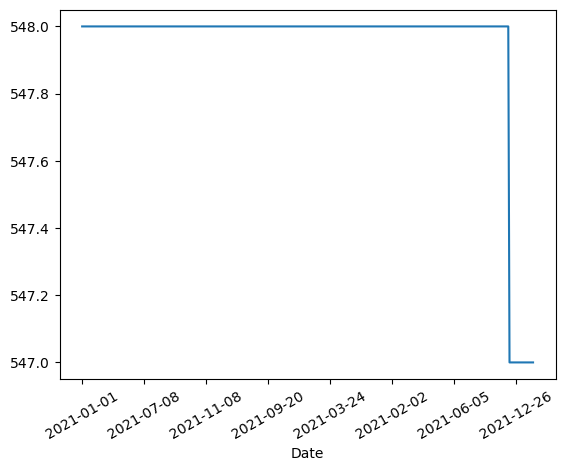

In [193]:
df.Date.value_counts().plot()
plt.xticks(rotation=30)

### Prepare the data

In [194]:
# Remove the campaign id and date column as it adds no value
df_new = df.drop(['Campaign_ID', 'Date'], axis=1) 
df_new

,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment
0,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness
1,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas
2,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers
3,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness
4,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts
199996,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies
199997,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts
199998,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies


In [195]:
# Convert Aquisition_Cost to numeric field
df_new['Acquisition_Cost'] = df_new['Acquisition_Cost'].str.replace('$', '')
df_new['Acquisition_Cost'] = df_new['Acquisition_Cost'].str.replace(',', '')
df_new['Acquisition_Cost'] = df_new['Acquisition_Cost'].astype(float)
df_new['Acquisition_Cost']

0         16174.0
1         11566.0
2         10200.0
3         12724.0
4         16452.0
           ...   
199995    18365.0
199996     8168.0
199997    13397.0
199998    18508.0
199999    13835.0
Name: Acquisition_Cost, Length: 200000, dtype: float64

In [196]:
df_new.describe()

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710
std,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581
min,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000
50%,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000
75%,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


### Lets plot the data to analyze in-depth

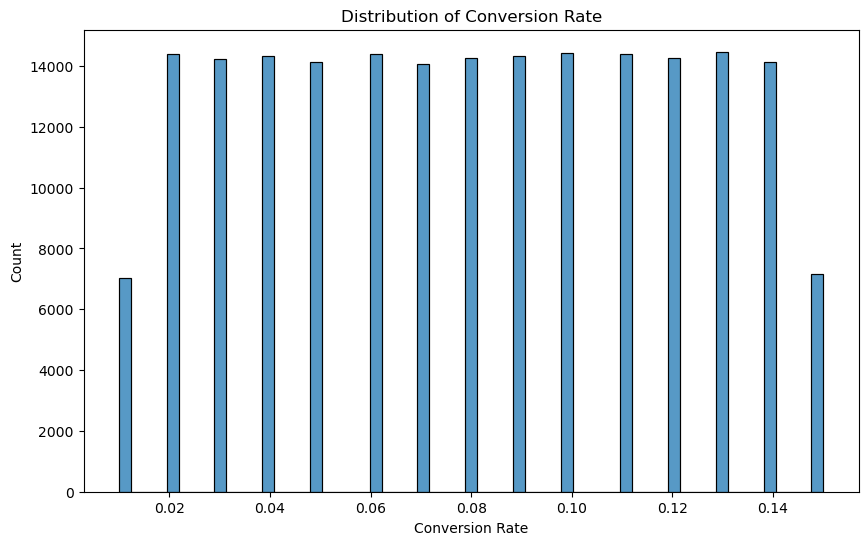

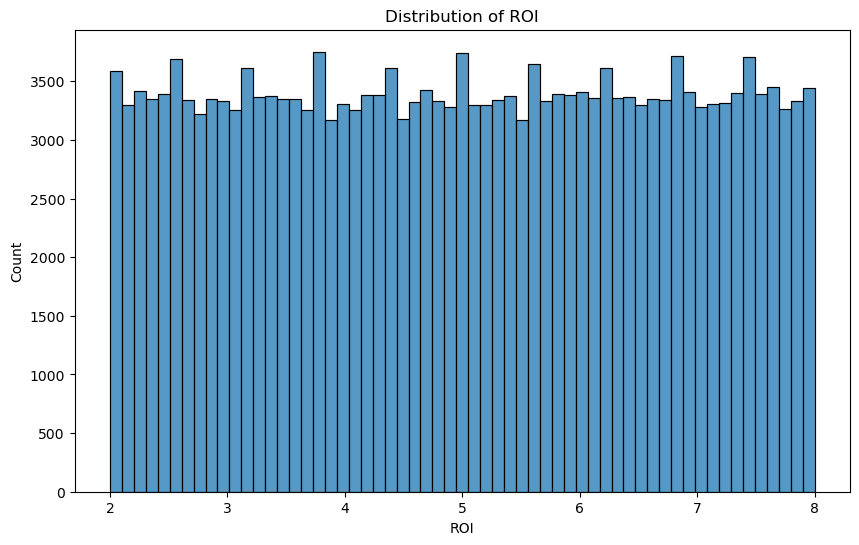

In [197]:
def plotHist(column, label):
    plt.figure(figsize=(10,6))
    sns.histplot(df_new, x=column)
    plt.title(str('Distribution of ') + label)
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.show()

plotHist('Conversion_Rate', 'Conversion Rate')
plotHist('ROI', 'ROI')

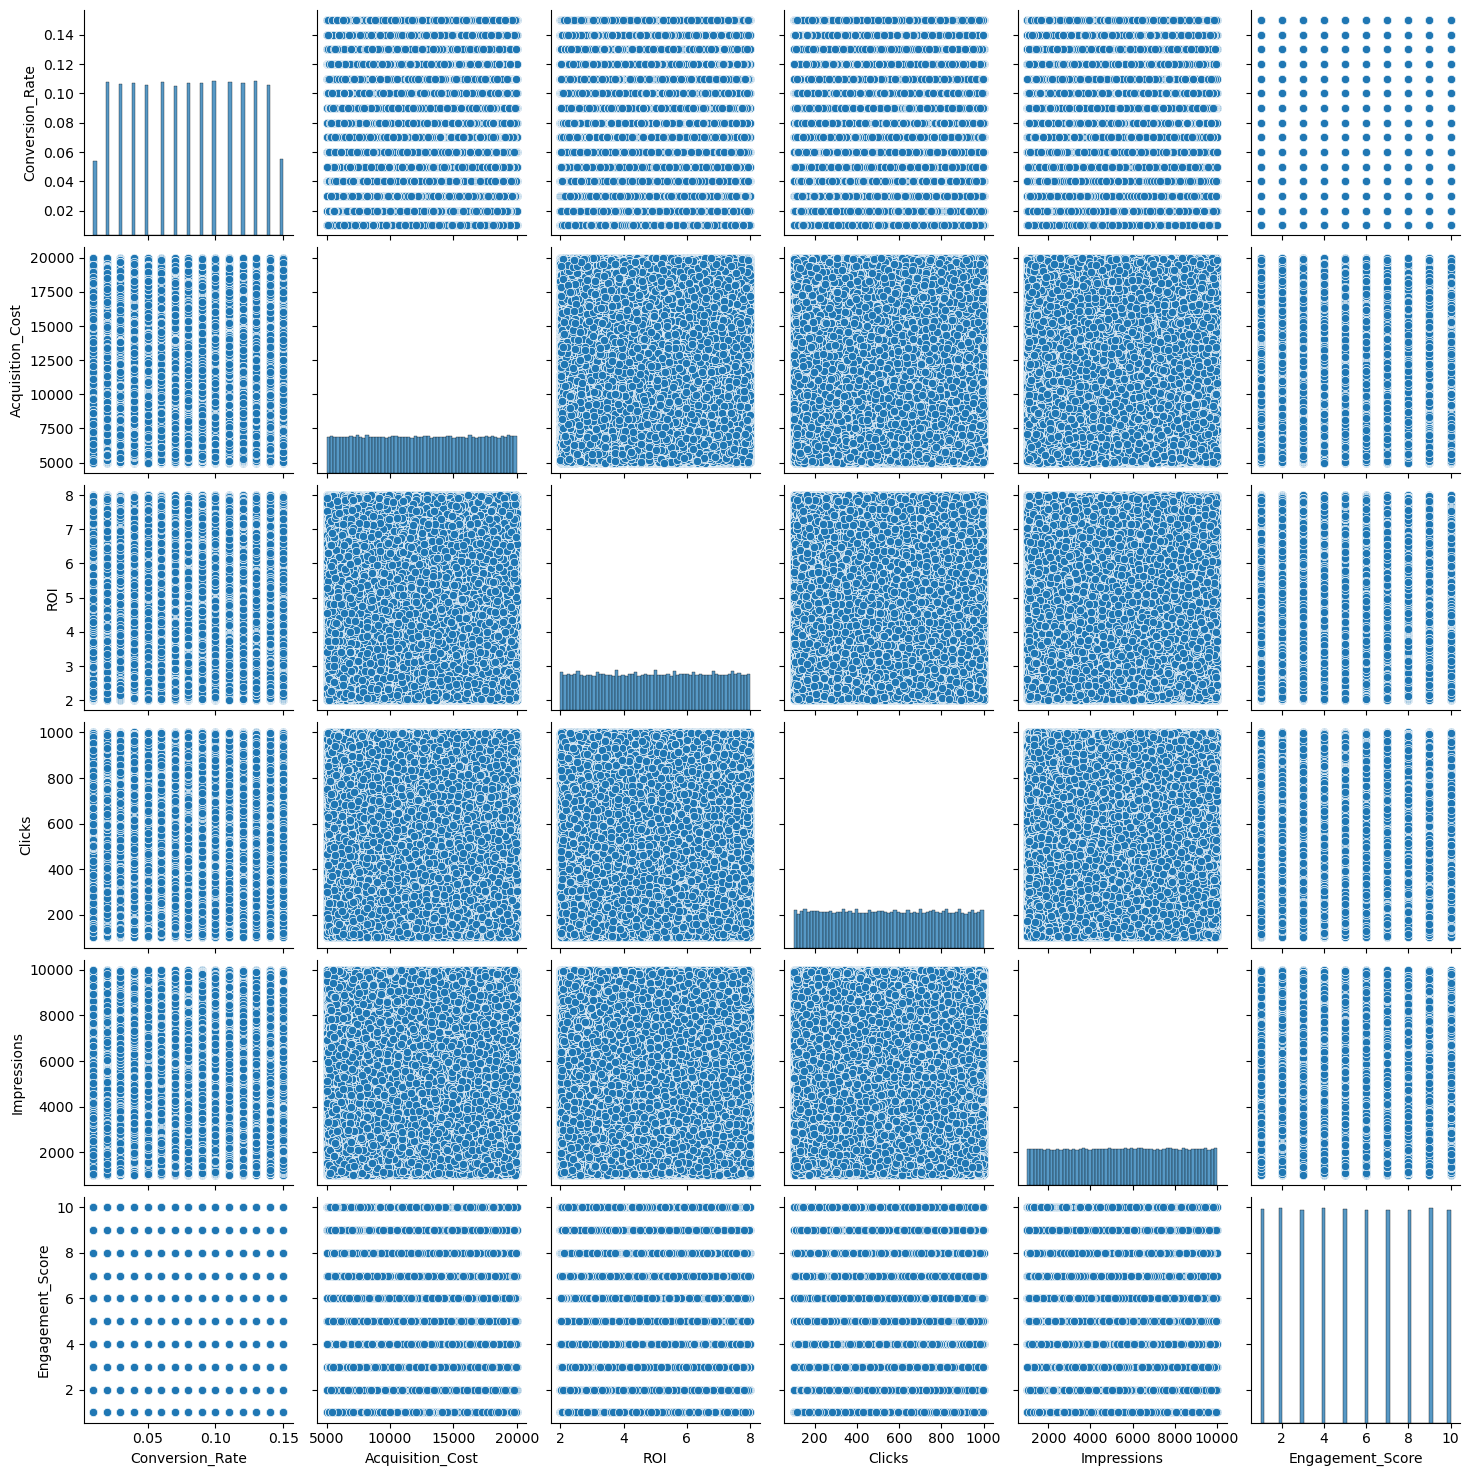

In [198]:
sns.pairplot(df_new)
plt.show()

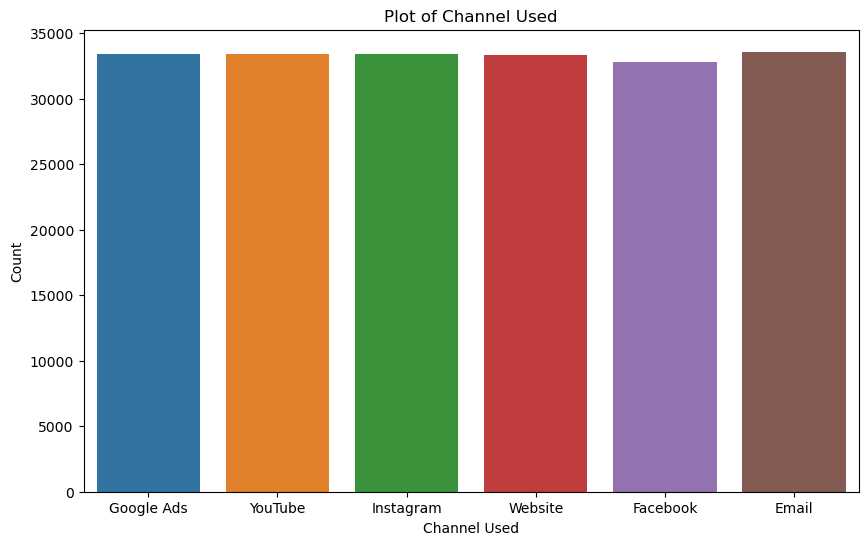

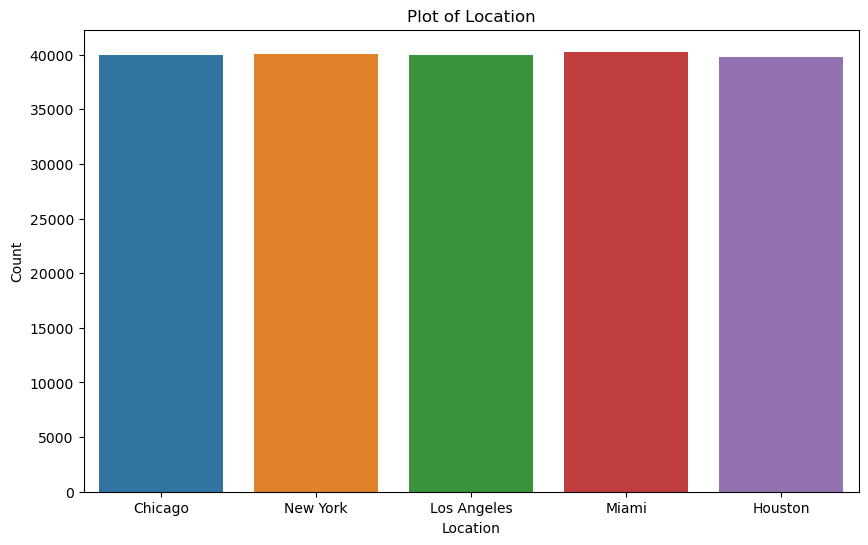

In [199]:
def barPlot(column, title):
    plt.figure(figsize=(10,6))
    sns.countplot(df, x=column)
    plt.title(str('Plot of ') + title)
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.show()

barPlot('Channel_Used', 'Channel Used')
barPlot('Location', 'Location')

### Build different models to predict the conversion rate based on other factors

In [200]:
mses={}
X = df_new.drop(['Conversion_Rate', 'ROI', 'Acquisition_Cost', 'Engagement_Score', 'Company'], axis=1)
y = df_new['Conversion_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [201]:
col_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), ['Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used', 'Location', 'Language', 'Customer_Segment']),
    remainder = StandardScaler()
)

#### Linear Regression

In [202]:
pipe_linear = Pipeline([
    ('col_transformer', col_transformer),
    ('model', LinearRegression())
])
pipe_linear

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('model', LinearRegression())])

In [203]:
pipe_linear.fit(X_train, y_train)
mse_linear = mean_squared_error(pipe_linear.predict(X_test), y_test)
mse_linear
mses['Linear Regression'] = mse_linear

In [204]:
    importance_standard = permutation_importance(pipe_linear, X_test, y_test, n_repeats = 10, random_state=22)['importances_std']

In [205]:
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importance_standard[i]}')

Campaign_Type: 2.1748645441194814e-05
Target_Audience: 2.4668111663049973e-05
Duration: 1.6020785823386975e-05
Channel_Used: 2.920798493755562e-05
Location: 2.561892641106799e-05
Language: 3.81055599690282e-05
Clicks: 1.8595889618950755e-05
Impressions: 2.7773831512170648e-05
Customer_Segment: 4.4742828844545684e-05


#### Linear regression with degree 2

In [206]:
pipe_linear_degree2 = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])
pipe_linear_degree2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('poly', PolynomialFeatures()), ('model', LinearRegression())])

In [207]:
pipe_linear_degree2.fit(X_train, y_train)
mse_linear_degree2 = mean_squared_error(pipe_linear_degree2.predict(X_test), y_test)
mse_linear_degree2
mses['Linear Regression - Degree 2'] = mse_linear_degree2

In [208]:
importance_standard_degree2 = permutation_importance(pipe_linear_degree2, X_test, y_test, n_repeats = 10, random_state=22)['importances_std']
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importance_standard_degree2[i]}')

Campaign_Type: 0.00019709889087348464
Target_Audience: 0.00021542181848358208
Duration: 0.00017199088197459325
Channel_Used: 0.0001488982366154199
Location: 0.0002618878487946734
Language: 0.00024304431242681544
Clicks: 9.066001663185087e-05
Impressions: 0.00016498615448238253
Customer_Segment: 0.00018094059926153982


#### Linear regression with degree 3

In [209]:
pipe_linear_degree3 = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])
pipe_linear_degree3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [210]:
#pipe_linear_degree3.fit(X_train, y_train)
#pipe_linear_degree3 = mean_squared_error(pipe_linear_degree3.predict(X_test), y_test)
#pipe_linear_degree3

In [211]:
#importance_standard_degree3 = permutation_importance(pipe_linear_degree3, X_test, y_test, n_repeats = 10, random_state=22)['importances_std']
#for i, col in enumerate(X_train.columns):
#    print(f'{col}: {importance_standard_degree2[i]}')

#### Ridge

In [212]:
pipe_ridge = Pipeline([
    ('col_transformer', col_transformer),
    ('model', Ridge())
])
pipe_ridge

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('model', Ridge())])

In [213]:
pipe_ridge.fit(X_train, y_train)
mse_ridge = mean_squared_error(pipe_ridge.predict(X_test), y_test)
mse_ridge
mses['Ridge'] = mse_ridge

#### Ridge with GridSearchCV

In [214]:
alphas = np.logspace(0, 10, 50)
param_dict = {'model__alpha': alphas}
grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_dict, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X, y)
grid_ridge.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('model', Ridge(alpha=10000000000.0))])

In [215]:
importance_standard_ridge = permutation_importance(grid_ridge.best_estimator_, X_test, y_test, n_repeats = 10, random_state=22)['importances_std']
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importance_standard_ridge[i]}')

Campaign_Type: 9.001183032803278e-11
Target_Audience: 8.203676185810143e-11
Duration: 7.18884486186642e-11
Channel_Used: 6.412472745780972e-11
Location: 5.991144339335883e-11
Language: 8.592470639862537e-11
Clicks: 4.035407545302529e-11
Impressions: 3.9192456273799634e-10
Customer_Segment: 2.0760232215955773e-10


In [216]:
mses['Ridge - Grid'] = mean_squared_error(grid_ridge.best_estimator_.predict(X_test), y_test)

#### Use SVM regression model

In [217]:
pipe_svr = Pipeline([
    ('col_transformer', col_transformer),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.2))
])
pipe_svr

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('svr', SVR(epsilon=0.2))])

In [218]:
pipe_svr.fit(X_train, y_train)
mse_svr = mean_squared_error(pipe_svr.predict(X_test), y_test)
mse_svr
mses['SVR'] = mse_svr

#### SVR with GridSearchCV

In [219]:
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.3],
    'svr__kernel': ['linear', 'poly', 'rbf']
}
grid_svr = GridSearchCV(pipe_svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X, y)
grid_svr.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('svr', SVR(C=0.1, kernel='linear'))])

In [220]:
mses['SVR-Grid'] = mean_squared_error(grid_svr.best_estimator_.predict(X_test), y_test)

#### Feature selection using Lasso

In [221]:
pipe_lasso = Pipeline([
    ('col_transformer', col_transformer),
    ('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=4)),
    ('model', Lasso(random_state = 42))
])
pipe_lasso

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('column_selector',
                 SequentialFeatureSelector(estimator=Lasso(random_state=42),
                                           n_features_to_select=4)),
                ('model', Lasso(random_state=42))])

In [222]:
pipe_lasso.fit(X_train, y_train)
mses['Lasso'] = mean_squared_error(pipe_lasso.predict(X_test), y_test)
original_features = pipe_lasso.named_steps['col_transformer'].get_feature_names_out()
selected_feature_indices = pipe_lasso.named_steps['column_selector'].get_support(indices=True)
selected_features = [original_features[i] for i in selected_feature_indices]
selected_features

['onehotencoder__Campaign_Type_Display',
 'onehotencoder__Campaign_Type_Email',
 'onehotencoder__Campaign_Type_Influencer',
 'onehotencoder__Campaign_Type_Search']

#### Feature selection using Lasso with degree 2

In [226]:
pipe_lasso_degree2 = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=4)),
    ('model', Lasso(random_state = 42))
])
pipe_lasso_degree2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('poly', PolynomialFeatures()),
                ('column_selector',
                 SequentialFeatureSelector(estimator=Lasso(random_state=42),
                                           n_features_to_select=4)),
                ('model', Lasso(random_state=42))])

In [233]:
pipe_lasso_degree2.fit(X_train, y_train)
mses['Lasso - Degree2'] = mean_squared_error(pipe_lasso_degree2.predict(X_test), y_test)
column_transformer_feature_names = pipe_lasso_degree2.named_steps['col_transformer'].get_feature_names_out()
poly_feature_names = pipe_lasso_degree2.named_steps['poly'].get_feature_names_out(column_transformer_feature_names)
poly_featuselector = pipe_lasso_degree2.named_steps['column_selector']
selector = pipe_lasso_degree2.named_steps['column_selector']
selected_feature_indices = selector.get_support(indices=True)
final_feature_names = poly_feature_names[selected_feature_indices]
print(final_feature_names)

['1' 'onehotencoder__Campaign_Type_Display'
 'onehotencoder__Campaign_Type_Email'
 'onehotencoder__Campaign_Type_Influencer']


In [232]:
pipe_linear_lasso = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=4)),
    ('model', LinearRegression())
])
pipe_linear_lasso

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Campaign_Type',
                                                   'Target_Audience',
                                                   'Duration', 'Channel_Used',
                                                   'Location', 'Language',
                                                   'Customer_Segment'])])),
                ('poly', PolynomialFeatures()),
                ('column_selector',
                 SequentialFeatureSelector(estimator=Lasso(random_state=42),
                                           n_features_to_select=4)),
                ('model', LinearRegression())])

In [234]:
pipe_linear_lasso.fit(X_train, y_train)
mses['Linear-Lasso - Degree2'] = mean_squared_error(pipe_linear_lasso.predict(X_test), y_test)
column_transformer_feature_names = pipe_linear_lasso.named_steps['col_transformer'].get_feature_names_out()
poly_feature_names = pipe_linear_lasso.named_steps['poly'].get_feature_names_out(column_transformer_feature_names)
poly_featuselector = pipe_linear_lasso.named_steps['column_selector']
selector = pipe_linear_lasso.named_steps['column_selector']
selected_feature_indices = selector.get_support(indices=True)
final_feature_names = poly_feature_names[selected_feature_indices]
print(final_feature_names)

['1' 'onehotencoder__Campaign_Type_Display'
 'onehotencoder__Campaign_Type_Email'
 'onehotencoder__Campaign_Type_Influencer']


Text(0.5, 1.0, 'Bar plot for MSE of different models')

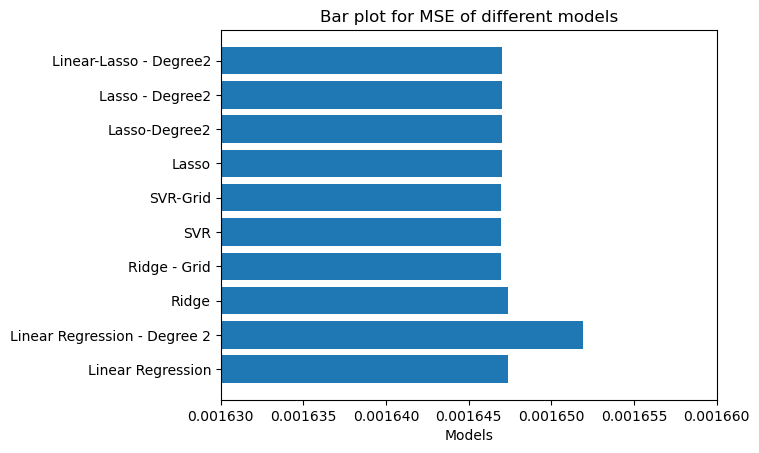

In [235]:
plt.barh(list(mses.keys()), list(mses.values()))
#plt.xticks(rotation=90)
plt.xlabel('MSE')
plt.xlabel('Models')
plt.xlim(left=0.00163, right=0.00166)

plt.title('Bar plot for MSE of different models')